# Биномиальное распределение

Пусть $X\sim Binom(n,p)$. Тогда

$$
\begin{aligned}
	P(X=k)&=C^k_n p^k(1-p)^{n-k} & k&=0,1,\ldots,n\\
	E(X)&=np \\ Var(X)&=np(1-p) \\ \sigma(X)&=\sqrt{Var(X)}=\sqrt{np(1-p)}
\end{aligned}
$$

In [18]:
import numpy as np
from scipy.stats import binom, poisson, norm
from math import exp, factorial, sqrt

import matplotlib.pyplot as plt

## Распределение вероятностей

Пусть 

$$
\begin{aligned}
	X_1&\sim Binom(3, 0.3) & X_2&\sim Binom(6, 0.6) & X_3&\sim Binom(9, 0.8)
\end{aligned}
$$

In [19]:
rv1 = binom(3, 0.3)
rv2 = binom(6, 0.6)
rv3 = binom(9, 0.8)

Распределения вероятностей

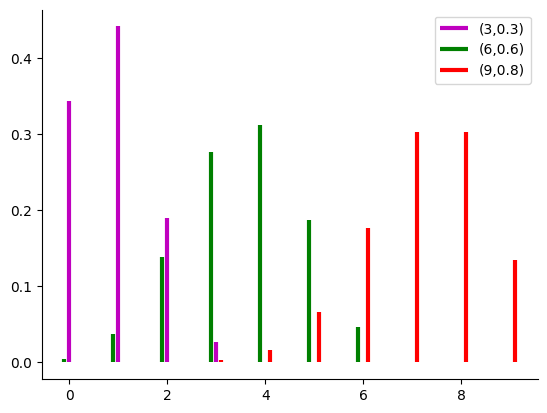

In [20]:
x1 = np.arange(4)
x2 = np.arange(7)
x3 = np.arange(10)

fig, ax =  plt.subplots(1,1)

ax.vlines(x1, 0, rv1.pmf(x1), linestyle='-', lw=3,  colors='m', label='(3,0.3)')
ax.vlines(x2-0.1, 0, rv2.pmf(x2), linestyle='-', lw=3, colors='g', label='(6,0.6)')
ax.vlines(x3+0.1, 0, rv3.pmf(x3), linestyle='-', lw=3, colors='r', label='(9,0.8)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()

Функции распределения

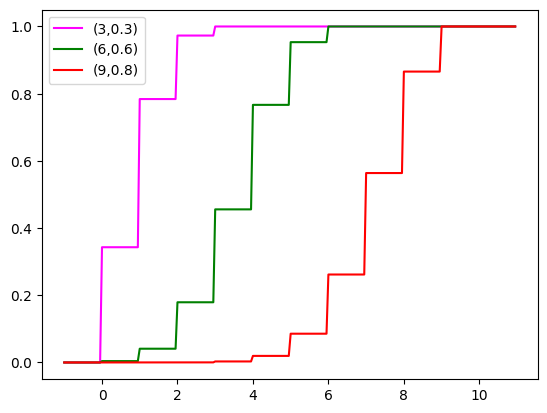

In [21]:
t = np.arange(-1, 11, 0.05)

plt.plot(t, rv1.cdf(t), color='magenta', label='(3,0.3)')
plt.plot(t, rv2.cdf(t), color='green', label='(6,0.6)')
plt.plot(t, rv3.cdf(t), color='red', label='(9,0.8)')
plt.legend()
plt.show()

Математическое ожидание

In [22]:
rv1.mean(), rv2.mean(), rv3.mean()

(np.float64(0.8999999999999999),
 np.float64(3.5999999999999996),
 np.float64(7.2))

Дисперсия

In [23]:
rv1.var(), rv2.var(), rv3.var()

(np.float64(0.6299999999999999),
 np.float64(1.4399999999999995),
 np.float64(1.4399999999999986))

Стандартное отклонение

In [24]:
rv1.std(), rv2.std(), rv3.std()

(np.float64(0.7937253933193771),
 np.float64(1.1999999999999997),
 np.float64(1.1999999999999995))

## Формула Пуассона

Пусть $X\sim Binom(n, \lambda/n)$. Тогда при больших $n$

$$
\begin{aligned}
	P(X=k)&\approx \frac{\lambda^k}{k!}\exp(-\lambda) & n&\gg 1
\end{aligned}
$$

__Замечаение__: фактически можно применять для случая $Binom(n,p)$ когда $n$ "большое", а $p$ "маленькое"

Пусть $X\sim Binom(n=500, p=0.01)$. Тогда $\lambda=np=5$

Имеем для $P(X=2)$

In [25]:
n = 500
p = 0.01
l = n*p

k=2

binom.pmf(k, n, p)

np.float64(0.08363103352119428)

In [26]:
poisson(l).pmf(2)

np.float64(0.08422433748856832)

In [27]:
exp(-l)*(l**k)/factorial(k)

0.08422433748856833

## Формула Муавра-Лапласа

Пусть $X\sim Binom(n,p)$ и

$$
\begin{aligned}
	\phi(t)&=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{t^2}{2}\right) & \Phi(t)&=\int_{-\infty}^t \phi(z)dz
\end{aligned}
$$

Тогда при больших $n$

- __Локальная формула Муавра-Лапласа__

$$
	P(X=k)\approx \frac{1}{\sqrt{np(1-p)}}\phi\left(\frac{k-np}{\sqrt{np(1-p)}}\right)
$$

- __Интегральная формула Муавра-Лапласа__

$$
\begin{gathered}
	P\left(a<\frac{X-np}{\sqrt{np(1-p)}}<b\right)\approx\int_a^b \phi(t)dt=\Phi(b)-\Phi(a) \\
	P\left(\frac{X-np}{\sqrt{np(1-p)}}<b\right)\approx\int_{-\infty}^b \phi(t)dt=\Phi(b) \\
	P\left(a<\frac{X-np}{\sqrt{np(1-p)}}\right)\approx\int_a^{+\infty} \phi(t)dt=1-\Phi(a)
\end{gathered}
$$

Пусть $X\sim Binom(n=300, p=0.4)$

Вычислим $P(X=3)$

In [28]:
n = 300
p = 0.4
k=100

binom(n, p).pmf(k)

np.float64(0.0028520685426985225)

In [29]:
norm.pdf((k-n*p)/sqrt(n*p*(1-p)))/sqrt(n*p*(1-p))

np.float64(0.0029232789328737384)

Вычислим 

$$
\begin{gathered}
	P\left(-2<\frac{X-np}{\sqrt{np(1-p)}}<3\right)=
	P\left(np-2\sqrt{np(1-p)}<X<np+3\sqrt{np(1-p)}\right)=\\
	P\left(120-2\sqrt{72}<X<120+3\sqrt{72}\right)=P(103< X\leq 145)
\end{gathered}
$$

In [30]:
binom(n, p).cdf(145)-binom(n, p).cdf(103)

np.float64(0.9734079802321669)

In [31]:
norm.cdf(3)-norm.cdf(-2)

np.float64(0.9758999700201907)